importing libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading and Viewing data

In [24]:
sal_df1 = pd.read_csv("C:\my files\Salary_EDA.csv")
sal_df1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


In [25]:
sal_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               371 non-null    object 
 2   Education Level      372 non-null    object 
 3   Job Title            370 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               372 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


conclusions:
* age,year of exp,salary have float data type
*  gender,education,jab title have object datatype
* Null - values exist because no same non-null values
* we have 6 features and 375 rows

null values

In [26]:
sal_df1.isnull().sum()

Age                    2
Gender                 4
Education Level        3
Job Title              5
Years of Experience    2
Salary                 3
dtype: int64

In [27]:
sal_df1.dropna(inplace = True)
sal_df1.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

conclusions: all the null value are dropped. now the features have non nulls

summary statistics

In [28]:
sal_df1.describe(include = "all")

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,366.000000,366,366,366,366.000000,366.000000
unique,NaN,2,3,169,NaN,NaN
top,NaN,Male,Bachelor's,Director of Marketing,NaN,NaN
freq,NaN,189,220,12,NaN,NaN
mean,37.459016,NaN,NaN,NaN,10.045082,100492.759563
std,6.962303,NaN,NaN,NaN,6.517102,48013.732434
min,23.000000,NaN,NaN,NaN,0.000000,350.000000
25%,32.000000,NaN,NaN,NaN,4.000000,56250.000000
50%,36.000000,NaN,NaN,NaN,9.000000,95000.000000
75%,44.000000,NaN,NaN,NaN,15.000000,140000.000000


conclusion:
* age:
* min age is 23,max age is 53,average age is 37.4
* majority of age falls btw 32 ad 44
* gender:
* there are 2 unique values male, female
* among 366,189 entries are male, 177 entries are female. so we can say male is slightly dominating
* education level:
* most of the data concentrates on bachelor's(dominating)
* job title:
* among 366, 12 times director of marketing is epeated. others are repeated less than 12 times which means no job title is dominating in the dataset
* year of exp:
* min exp is 0,max exp is 25,average exp is 10 years
* majority of exp falls btw 4 ad 15 
* salary:
* min sal is 350,max sal is 250000,average sal is 100492 years
* majority of sal falls btw 56250 ad 140000
* there might be oyliers,min = 350, avg = 1 lakh, there is lot of difference(error,part-time)


visualization

1.analyze age distribution[histogram]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


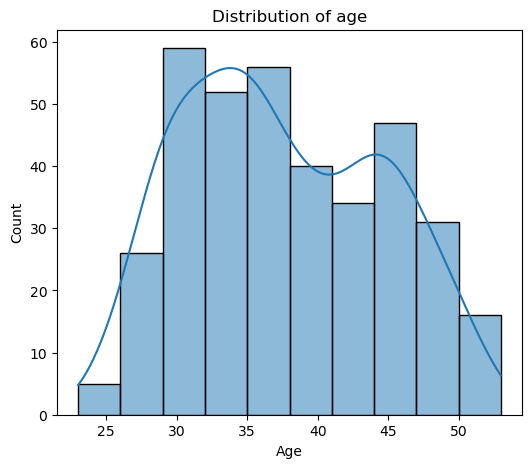

In [29]:
plt.figure(figsize = (6,5))
sns.histplot(sal_df1["Age"],kde = True, bins =10)
plt.title("Distribution of age")
plt.show()

1) average age is 34
2) after 45 its positive skew
3) no outliers
4) majarity of the people are having 30 age

2.analysis the distrubtuion of salary using histogram 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


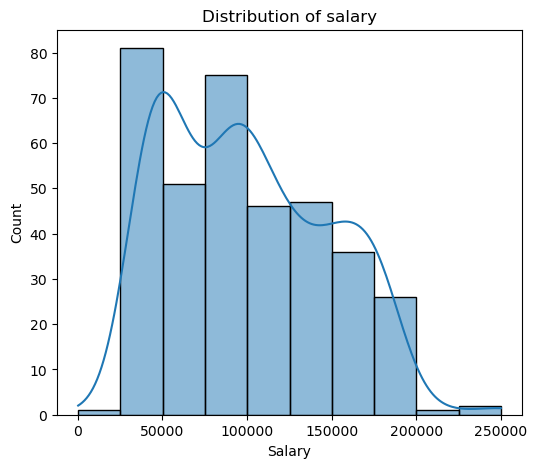

In [30]:
plt.figure(figsize = (6,5))
sns.histplot(sal_df1["Salary"],kde = True, bins =10)
plt.title("Distribution of salary")
plt.show()

1) postivi skew is from 15 lakh 
2) majarity people get 500000 sal
3) every less people sal is less then 50000
4) no outliers

3.analyis sal distrubtion using boxplot

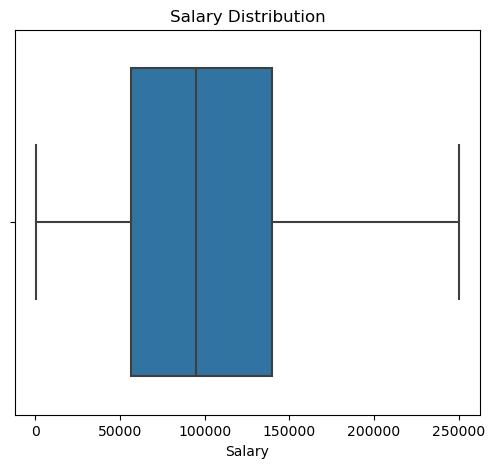

In [31]:
plt.figure(figsize = (6,5))
sns.boxplot(x=sal_df1["Salary"])
plt.title("Salary Distribution")
plt.show()

In [11]:
1) no outliers
2) average sal is around 100000

SyntaxError: unmatched ')' (4055739623.py, line 1)

find the correation matrix

In [32]:
sal= sal_df1.select_dtypes(include = ["number"])
sal.head()

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,36.0,7.0,60000.0


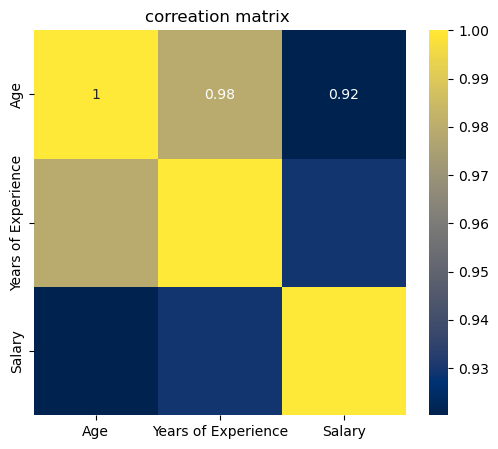

In [33]:
plt.figure(figsize = (6,5))
sns.heatmap(sal.corr(),cmap = "cividis",annot = True)
plt.title("correation matrix ")
plt.show()

1) it shows the correlation btw age sal and exp
2) there is a postivie correlation btw age and exp
3) the correlation btw age and sal is less

draw a count plot btw for the feature gender
draw a count plot on eduction level

Text(0.5, 1.0, 'count of exp')

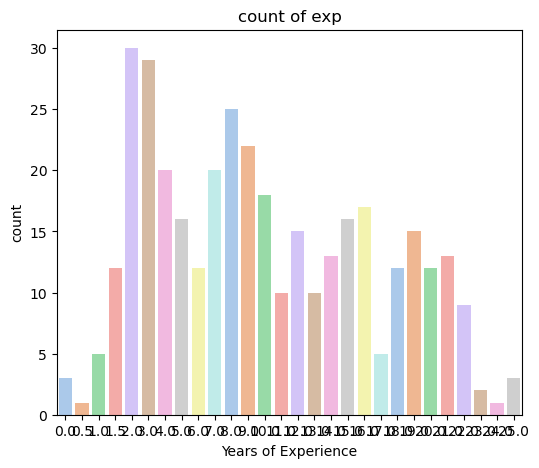

In [34]:
plt.figure(figsize = (6,5))
sns.countplot(x=sal_df1["Years of Experience"],palette = "pastel")
plt.title("count of exp")


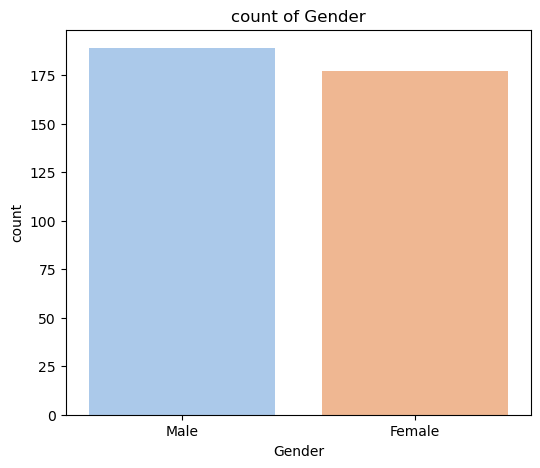

In [35]:
plt.figure(figsize = (6,5))
sns.countplot(x=sal_df1["Gender"],palette = "pastel")
plt.title("count of Gender")
plt.show()

1) group eduction level anf find average salary
2) filter data set in which gender is female and eduction level is masters and avg sal on that data set
3) filter data setin which expre is more then 20 years and find the average salary on that data set

In [36]:
sal_df1.groupby('Education Level')['Salary'].mean()


Education Level
Bachelor's     74683.409091
Master's      129473.684211
PhD           157843.137255
Name: Salary, dtype: float64

In [18]:
fil_exp_20more = sal_df[sal_df["Years of Experience"]>20].mean()
fil_exp_20more.head()


Age                        49.535714
Years of Experience        22.000000
Salary                 175892.857143
dtype: float64